# __Verve Group Data Science Case Study__
## *Instructions*
Thank you for undertaking our data science case study. The purpose of this case study is to help us to better understand your problem solving aptitude, data science knowledge and your communication skills. This challenge is not timed, so you can take it whenever you have about an hour free in your day. Our expectation is for you to not spend more than one hour on this. 

Below you will be given a scenario with some accompanying data. In order to contain the amount of time this task will take to complete, we’ve provided you with pre aggregated data and information on which you can draw your conclusions.

We ask that you please submit your answer in a public Github repository. Write up your findings in a Markdown document and place any other notebooks or demo data manipulation code in the same folder with documentation. Please do not post your reply in comments to this case study, instead send the link to us via email.

Thank you, and good luck!

## *Scenario 1*
We participate in a series of auctions where the commodity being auctioned is the opportunity to show an advertisement to random non-identifiable users of application A. 

Each time when some user comes online, we receive a request from app A to participate in an auction, where we are required to respond if we would like to show an ad at that given point.  The response contains our bid valuation (bid price), i.e., what are we willing to pay to the publisher of application A to have our ad shown to the user, along with the creative of the ad that we would like to show to the user. 

Internally, publisher of the application is conducting an auction where it requests several other entities like us to place their bids if we would like to place our ad in their application A. For a given auction, the participant (also called bidder) willing to pay the highest value, i.e., bidder with the highest bid wins the auction, gets a win response notification, which tells them, that they have won the auction and that their ad is rendered.

The following diagram illustrates a request from publisher with payload telling us that the application is A.

**Figure 1. Outgoing Requests from publisher's perspective** 
```mermaid
graph LR 
publisher -- "request(A)" --> V(Verve)
publisher -- "request(A)" --> E1(Entity<sub>1</sub>)
publisher -- "request(A)" --> E2(Entity<sub>2</sub>)
publisher -- "request(A)" --> EN(Entity<sub>N</sub>)
```

In reply, the entities can send a response back to the publisher with their valuations, and an ad creative. In real world, we do not know how many participants are there in a publisher auction and what are their responses. The following is the view from publisher perspective.

**Figure 2. Incoming responses from publisher's perspective**
``` mermaid
graph LR
V(Verve) -- "response($10, Ad_verve)" --> publisher
E1(Entity<sub>1</sub>) -- "response($8, Ad_1)" --> publisher
E2(Entity<sub>2</sub>) -- "response($6, Ad_2)" --> publisher
EN(Entity<sub>N</sub>) -- "response(No bid)" --> publisher
```

Publisher decides that Verve is the winner in this case and will render Ad_verve and since it is a first price auction, verve will have to pay $10 to the advertiser.

When we win the publisher will send us a win notice, which gives us the information that we were the highest bidders and have won. We do not recieve any notification if we lose. Absence of a notification indicates that there was atleast one competing bidder, who bid a  value higher than us.

**Figure 3. Win notification from publisher to the winning bidder**
```mermaid
graph LR
publisher -- "win notice($10)" --> Verve
```

The following table contain the aggregated outcomes of several auctions that we participated in application A. We responded with a variety of bid prices (bid_price column), and either won that auction or lost it (indicated via 1 or 0 in the win column). The events column show how many times a particular response with a given outcome was observed.

**Table 1. Aggregated Auction Statistics for application A**

|    | app   |   bid_price |   win |   events |
|---:|:------|------------:|------:|---------:|
|  0 | A     |        0.01 |     0 |   100000 |
|  1 | A     |        0.01 |     1 |        0 |
|  2 | A     |        0.1  |     0 |     7000 |
|  3 | A     |        0.1  |     1 |     3000 |
|  4 | A     |        0.2  |     0 |  8000000 |
|  5 | A     |        0.2  |     1 |  2000000 |
|  6 | A     |        0.4  |     0 |   700000 |
|  7 | A     |        0.4  |     1 |   300000 |
|  8 | A     |        0.5  |     0 |    80000 |
|  9 | A     |        0.5  |     1 |    20000 |
| 10 | A     |        0.75 |     0 |     7000 |
| 11 | A     |        0.75 |     1 |     3000 |
| 12 | A     |        1    |     0 |      400 |
| 13 | A     |        1    |     1 |      600 |
| 14 | A     |        2    |     0 |       30 |
| 15 | A     |        2    |     1 |       70 |
| 16 | A     |        5    |     0 |        2 |
| 17 | A     |        5    |     1 |        8 |
| 18 | A     |        9    |     0 |        0 |
| 19 | A     |        9    |     1 |        1 |

#### *Problem 1*
Based on Table in above Scenario, estimate the expected win rate for a bid repsonse at a given price (prices are listed in table). State your assumptions clearly and provide the steps on how you arrived at your answer.

#### *Problem 2*
We receive money from our advertisers if we deliver them a win. Lets say that our advertiser is willing to pay $0.50 per win. This then becomes the upper bound for the bid valuation that we can submit in response to the publisher. For example, if we submit a bid response of $0.40 and we win, then the advertiser pays us $0.50, we pay $0.40 to the publisher and we made a net revenue of $0.10 .

If our goal was to maximize net revenue, what is the most optimal bid valuation we should send in our response? Use your estimations from Problem1 and all other available information. 

Here is the json for Table 1 if you want to play around with it.
```json
[
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}
]
```

In [57]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
ls = [
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}
]

In [47]:
df = pd.DataFrame( ls )

In [48]:
df.shape

(20, 4)

In [49]:
df

,app,bid_price,win,events
0,A,0.01,0,100000
1,A,0.01,1,0
2,A,0.10,0,7000
3,A,0.10,1,3000
4,A,0.20,0,8000000
5,A,0.20,1,2000000
6,A,0.40,0,700000
7,A,0.40,1,300000
8,A,0.50,0,80000
9,A,0.50,1,20000


### Solution 1

In [50]:
def calculate_wnirate(df):
    """
    Function to calculate winrate give a particular bid_price data
    """
    return df[df.win == 1]["events"].values / ( df[df.win == 1]["events"].values  + df[df.win == 0]["events"].values )

winrate = df.groupby(["app","bid_price"]).apply( lambda x : calculate_wnirate( x  )[0] )

In [51]:
winrate = pd.DataFrame(winrate).reset_index()

In [52]:
#renaming the column as winrate
winrate = winrate.rename({0:"winrate"}, axis = 1)

In [75]:
#adding a column of total_events to the data
winrate["total_events"] = df.groupby("bid_price").sum()["events"].values

In [76]:
winrate

,app,bid_price,winrate,total_events
0,A,0.01,0.0,100000
1,A,0.10,0.3,10000
2,A,0.20,0.2,10000000
3,A,0.40,0.3,1000000
4,A,0.50,0.2,100000
5,A,0.75,0.3,10000
6,A,1.00,0.6,1000
7,A,2.00,0.7,100
8,A,5.00,0.8,10
9,A,9.00,1.0,1


Visualisation of the `bid_price` vs `win_rate` .
The size of the dots denote the total events

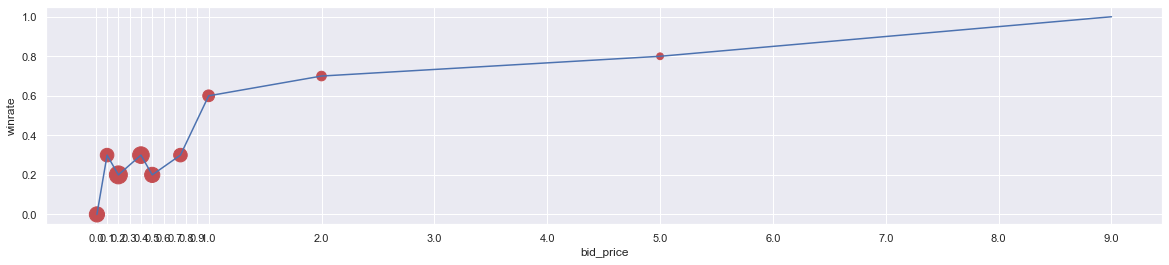

In [85]:
plt.figure(figsize = (20,4))
plt.plot( winrate.bid_price, winrate.winrate)
plt.scatter( winrate.bid_price, winrate.winrate, s = np.log(winrate['total_events'])*20, c = 'r')
plt.xlabel("bid_price")
plt.ylabel("winrate");
plt.xticks(np.append(np.arange(0,1,0.1),  np.arange(1,10)));

### Solution 2

We are calculating the estimated revenue with each bid_price considering we atleast get a 0.01$ from each win i.e. *net_revenue* from each win is 0.01 $. Although this is not desirable . In reality greater value bids will give more profit/win while smaller price bids will give less profit/win. 

**It will always be a trade-off between number of events and bid_price.** 

In [87]:
# estimated win considering
df['estimated_revenue'] = df.win * df.events * 0.01

In [88]:
df

,app,bid_price,win,events,estimated_revenue
0,A,0.01,0,100000,0.00
1,A,0.01,1,0,0.00
2,A,0.10,0,7000,0.00
3,A,0.10,1,3000,30.00
4,A,0.20,0,8000000,0.00
5,A,0.20,1,2000000,20000.00
6,A,0.40,0,700000,0.00
7,A,0.40,1,300000,3000.00
8,A,0.50,0,80000,0.00
9,A,0.50,1,20000,200.00


0.2 as the bid_valuation --> we winrate is 20% but total wins are 2000000

In [ ]:
now even if we original_bidget is 

In [83]:
2000000 * .01

20000.0

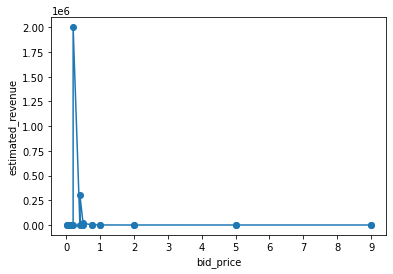

In [41]:
plt.plot( df.bid_price, df.estimated_revenue)
plt.scatter( df.bid_price, df.estimated_revenue)
plt.xlabel("bid_price")
plt.ylabel("estimated_revenue");
plt.xticks(np.arange(0,10));